# Projeto 2  - Ciencia dos Dados

### Professor: Maria Kelly Venezuela

### Turma: 2A

### Alunos:

Eduardo Araujo Rodrigues da Cunha

Paulo Henrique Moreira Falcão

Pedro Santos Rocha Von Dannecker

___

## Intuito do projeto

O projeto tem como objetivo, a partir de um base de dados, definir um target quantitativo, isto é, uma informação numérica, no caso, o banco de dado escolhido foi o de estatísticas de streamers da plataforma twitch durante um ano, e com estas informações, montar um modelo, que consiga prever o número de seguidores que um canal da plataforma ganhou, baseado em outras informações, como o número médio de viewers, tempo de stream, pico de viewers em um mesmo instante, entre outras.

<img src = "img_twitch.png"
     width = 500
     alt="Logo Twitch"
     style="align:center;" />

___

## Preparando os dados
#### Importando bibliotecas básicas

In [1]:
import math
import os
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from numpy import arange
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from IPython.display import display  # Para ter melhor print.

#### Import do Dataframe

In [2]:
dados = pd.read_csv('twitchdata-update.csv')

___

## O Dataframe

O Dataframe foi retirado do site [Kaggle](https://www.kaggle.com/aayushmishra1512/twitchdata), e tem dados de 1000 streamers da plataforma, as colunas do Dataframe são as seguintes:
* **Channel:** Nome do canal do streamer, por exemplo, *Gaules*;

* **Watch time(Minutes):** Tempo total de visualização no ano em minutos;

* **Stream time(Minutes):** Tempo total em que a live ficou aberta no ano em minutos;

* **Peak viewers:** O pico de usuarios assistindo a live ao mesmo tempo nesse ano;

* **Average viewers:** Média de usuarios assistindo a live simultaneamente;

* **Followers:** Número atual de seguidores;

* **Followers gained:** Número de seguidores ganhos no último ano;

* **Views gained:** Número de views ganhas no último ano;

* **Partnered:** Se tem ou não uma parceria com a Twitch **(True ou False)**;

* **Mature:** Se o conteúdo da live é recomendado ou não para maiores de 18 **(True ou False)**;

* **Language:** Idioma da live;

In [3]:
dados.head(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
#Verificando se todos os tipos estão corretos:
dados.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

#### Simplificando a variável Language

Para analisar a variável Language, será interessante transformá-la em uma variável do tipo "dummies". Para evitar um número muito grande de variáveis, optamos por separar a lingua entre as 7 mais faladas e "Outras". 

*Obs:* Em uma análise inicial, não transformou-se elas em dummies.

In [5]:
dados['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Finnish         1
Swedish         1
Other           1
Slovak          1
Greek           1
Name: Language, dtype: int64

In [6]:
dados.Language.loc[(dados.Language != 'English')&(dados.Language != 'Korean')&(dados.Language != 'Russian')&
              (dados.Language != 'Spanish')&(dados.Language != 'French')&(dados.Language != 'Portuguese')&
              (dados.Language != 'German')] = 'Others'


C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
#Consertando os tipos:
dados['Language'] = dados['Language'].astype('category')

In [8]:
dados

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


Assim, todas as variáveis já estão corretas.

#### Criando coluna de seguidores iniciais
Como o número de followers representa a quantidade de seguidores ao final do ano não faria sentido fazer uma análise entre essa  variável e followers gained, por isso criamos uma nova coluna que representa a quantidade inicial de seguidores dentro do período analisado, chamada initial followers

In [9]:
dados['Initial followers'] = dados['Followers'] - dados['Followers gained']
dados.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Initial followers
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,1511488
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,3939979
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,743856
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,3240864
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,6870479


___

## Iniciando Análise Exploratória
#### Histograma da variável de estudo
Inicialmente plotamos o histograma da variável estudada para entender sua distribuição

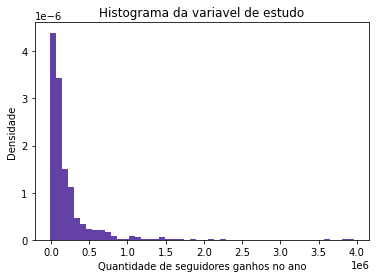

In [10]:
plt.title('Histograma da variavel de estudo')
plt.hist(dados['Followers gained'], bins=50, density = True, color='#6441A4')
plt.ylabel('Densidade')
plt.xlabel('Quantidade de seguidores ganhos no ano')
plt.show()

A variável aparenta seguir uma distribuição exponencial, para testar tal hipotese utilizou-se a função probplot:

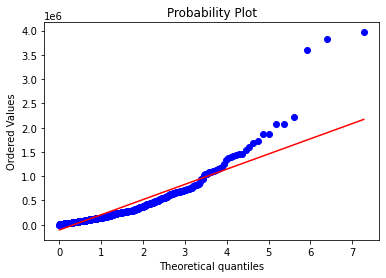

In [11]:
stats.probplot(dados['Followers gained'], dist=stats.expon, plot=plt);

Quanto mais próximos os pontos azuis estão da reta vermelha, mais próxima a distribuição da variável estará de uma exponencial. Dessa forma, foi possível perceber que os menores valores realmente estão distribuidos como exponencial, e conforme o número de seguidores ganhos aumenta, mais distante a distribuição fica de uma exponencial. 

#### Gráficos de dispersão 
Para facilitar a análise criou-se um dataframe apenas com as variáveis quantitativas. 

In [12]:
df_quantitativo = dados.drop(['Channel','Partnered', 'Mature', 'Language'] , 1)
df_qualitativo = dados.loc[:,['Mature','Partnered','Language']]

Para visualizar a correlação entre as variáveis quantitativas e a variável de estudo, além de calcular essas correlações, utilizou-se gráficos de dispersão e a fim de gerar os gráficos utilizou-se a biblioteca seaborn.

In [13]:
corrMatrix = df_quantitativo.corr()
corrMatrix = pd.DataFrame(corrMatrix['Followers gained'])
corrMatrix

,Followers gained
Watch time(Minutes),0.514648
Stream time(minutes),-0.158165
Peak viewers,0.470415
Average viewers,0.420097
Followers,0.715618
Followers gained,1.000000
Views gained,0.244297
Initial followers,0.386886


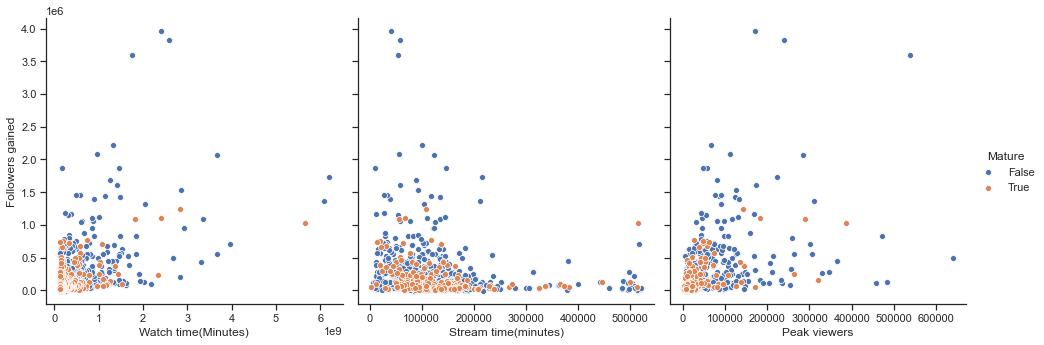

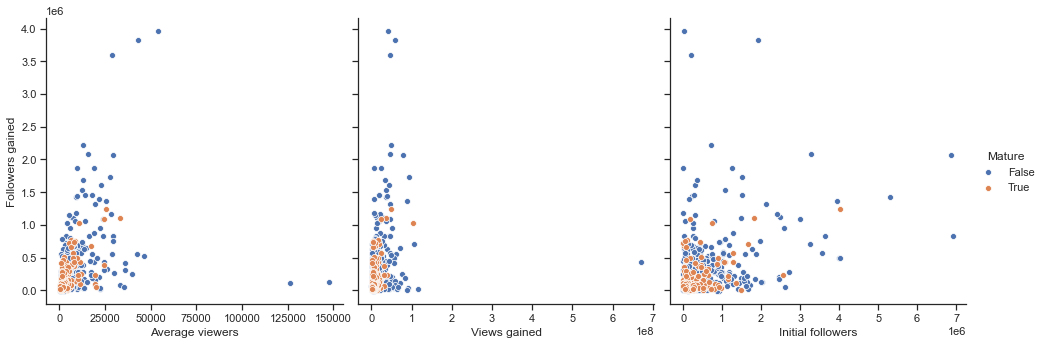

In [14]:
sns.set(style="ticks")

sns1 = sns.pairplot(dados, hue = 'Mature', y_vars=['Followers gained'],
             x_vars=['Watch time(Minutes)', 'Stream time(minutes)','Peak viewers'],
                    height = 4.5)

sns2 = sns.pairplot(dados, hue = 'Mature', y_vars=['Followers gained'],
             x_vars=['Average viewers','Views gained', 'Initial followers'],
                    height = 4.5)

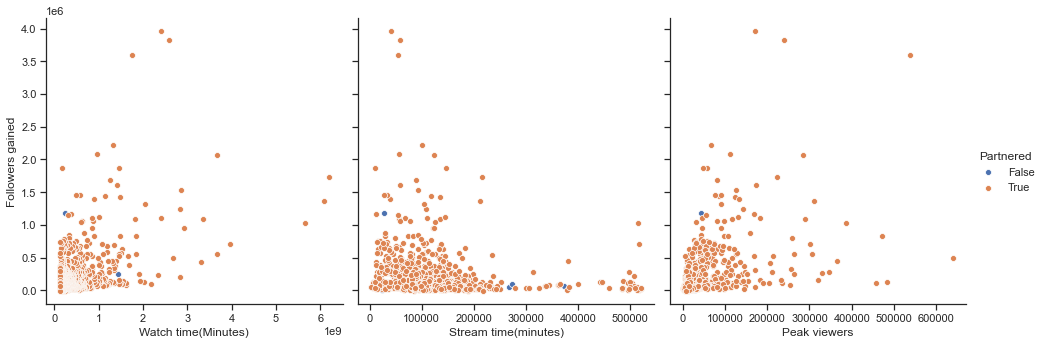

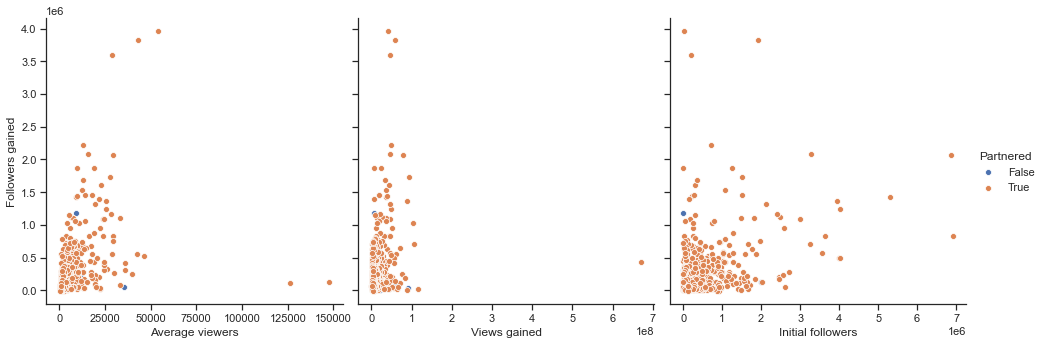

In [15]:
sns3 = sns.pairplot(dados, hue = 'Partnered', y_vars=['Followers gained'],
             x_vars=['Watch time(Minutes)', 'Stream time(minutes)',
                     'Peak viewers'], height = 4.5)

sns4 = sns.pairplot(dados, hue = 'Partnered', y_vars=['Followers gained'],
             x_vars=['Average viewers',
                     'Views gained', 'Initial followers'],
                     height = 4.5)

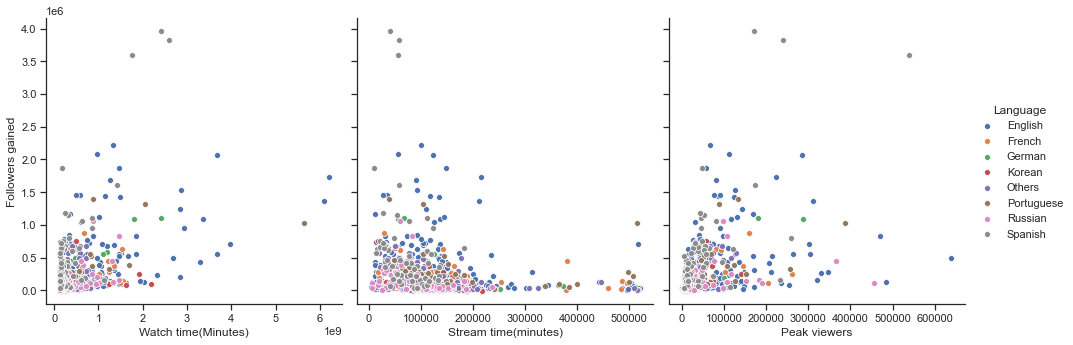

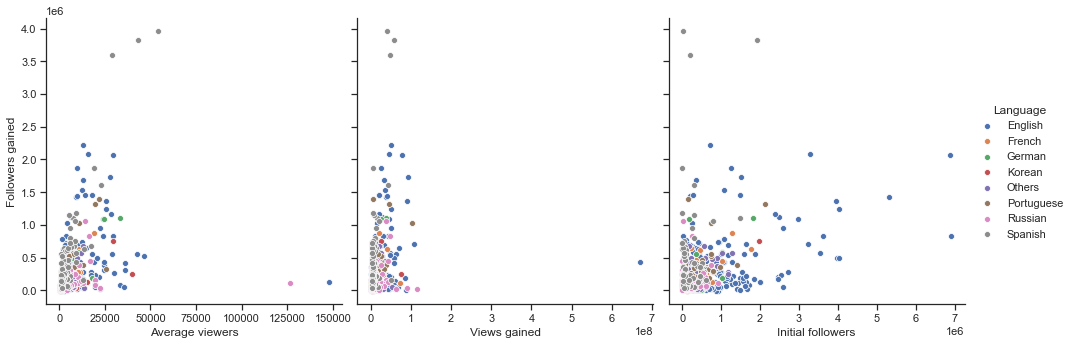

In [16]:
sns5 = sns.pairplot(dados, hue = 'Language', y_vars=['Followers gained'],
             x_vars=['Watch time(Minutes)', 'Stream time(minutes)',
                     'Peak viewers'],
                     height =4.5)

sns6 = sns.pairplot(dados, hue = 'Language', y_vars=['Followers gained'],
             x_vars=['Average viewers','Views gained', 'Initial followers'],
                     height =4.5)

Em uma primeira análise percebemos que os valores estão muito concentrados na parte inferior esquerda do gráfico. Para tentar melhorar a análise transformou-se a escala do dataframe para uma escala logarítimica. Para realizar a conversão todos os valores devem ser positivos, sendo assim, foi necessário deletar as linhas que possuiam valores negativos. Isso só pode ser feito pois a quantidade de linhas com valores negativos é desprezivel em relação ao total.

In [17]:
for coluna in df_quantitativo.columns:
    a=df_quantitativo.loc[df_quantitativo[coluna]<0,:]
    print(len(a),coluna)

0 Watch time(Minutes)
0 Stream time(minutes)
0 Peak viewers
0 Average viewers
0 Followers
3 Followers gained
0 Views gained
0 Initial followers


In [18]:
#Dataframe com apenas linhas com valores positivos em todas colunas
df_p = dados.loc[dados["Followers gained"]>0,:]

In [19]:
#Dataframe de variáveis quantitativas e qualitativas após a transformação logarítmica
df_quantitativo2 = df_p.drop(['Channel','Partnered', 'Mature', 'Language'] , 1)
df_qualitativo2 = df_p.loc[:,['Mature','Partnered','Language']]

In [20]:
#Dataframe com log
df_log = np.log(df_quantitativo2)
df_log

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Initial followers
0,22.547196,12.279555,12.313671,10.229765,14.993026,14.366408,18.348505,14.228605
1,22.530189,12.263610,12.647542,10.150738,15.485133,14.130456,18.312048,15.186686
2,22.453964,13.152466,12.866994,9.303466,14.385153,13.839011,18.446462,13.519603
3,22.102112,13.157228,12.613453,8.950792,15.187921,13.464514,18.484096,14.991351
4,22.023730,11.725291,12.562502,10.295597,16.005923,14.542298,18.184941,15.742744
...,...,...,...,...,...,...,...,...
994,18.624671,11.542678,9.586445,7.081709,10.779102,9.104424,18.288332,10.571625
995,18.623823,9.514880,9.969228,9.116469,13.307891,13.240486,14.586594,10.577350
996,18.623815,11.938193,8.278936,6.675823,12.270042,10.864541,15.297092,11.988681
998,18.622078,11.559284,9.263217,7.050123,13.213019,11.600121,15.183365,12.990739


In [21]:
#Dataframe com ambos tipos de variáveis
df_log2 = df_log.join(df_qualitativo2)

Após as mudanças percebe-se que os gráficos de disperção estão melhor distribuidos no plano. Além disso, algumas correlações aumentaram, como a correlação entre a variavel "Peak viewers" e a variável de estudo.

In [22]:
corrMatrix = df_log.corr()
corrMatrix = pd.DataFrame(corrMatrix['Followers gained'])
corrMatrix

,Followers gained
Watch time(Minutes),0.456449
Stream time(minutes),-0.286205
Peak viewers,0.582791
Average viewers,0.570031
Followers,0.682787
Followers gained,1.000000
Views gained,0.389938
Initial followers,0.203256


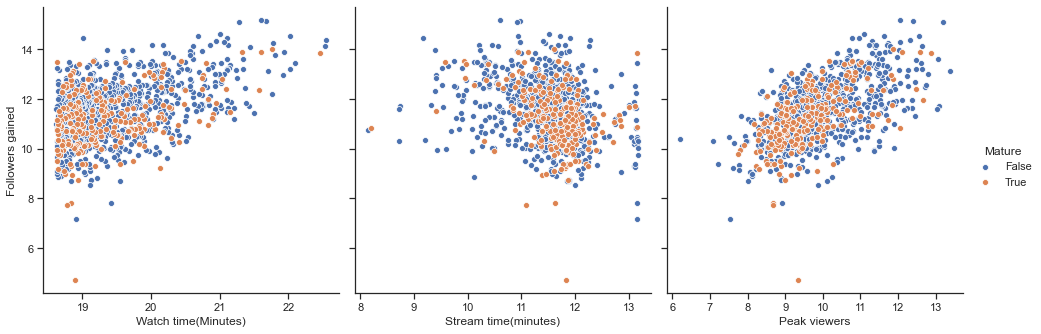

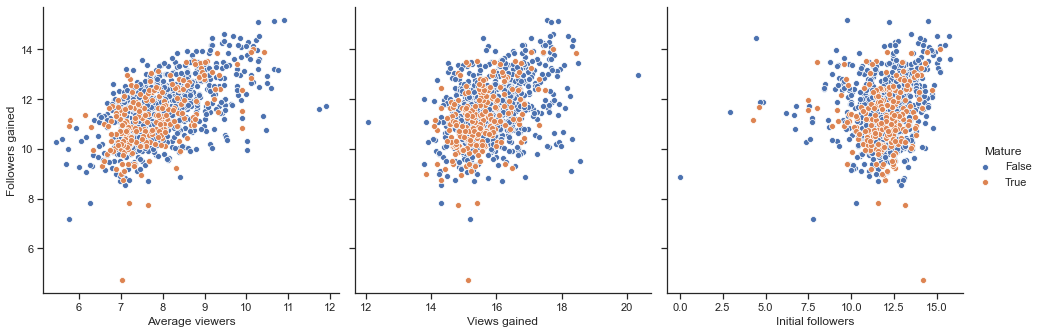

In [23]:
sns.set(style="ticks")

sns1 = sns.pairplot(df_log2, hue = 'Mature', y_vars=['Followers gained'],
             x_vars=['Watch time(Minutes)', 'Stream time(minutes)','Peak viewers'],
                    height = 4.5)

sns2 = sns.pairplot(df_log2, hue = 'Mature', y_vars=['Followers gained'],
             x_vars=['Average viewers','Views gained', 'Initial followers'],
                    height = 4.5)

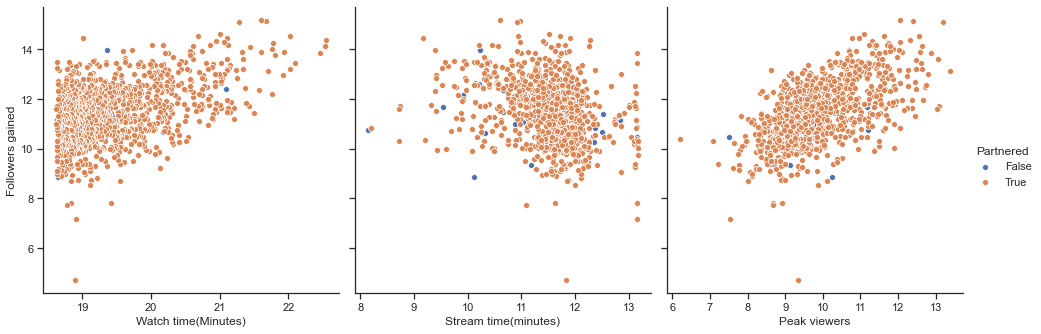

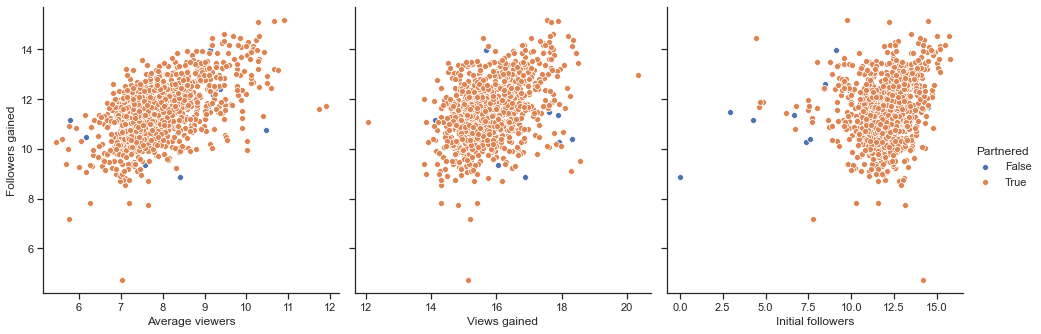

In [24]:
sns3 = sns.pairplot(df_log2, hue = 'Partnered', y_vars=['Followers gained'],
             x_vars=['Watch time(Minutes)', 'Stream time(minutes)',
                     'Peak viewers'], height = 4.5)

sns4 = sns.pairplot(df_log2, hue = 'Partnered', y_vars=['Followers gained'],
             x_vars=['Average viewers',
                     'Views gained', 'Initial followers'],
                     height = 4.5)

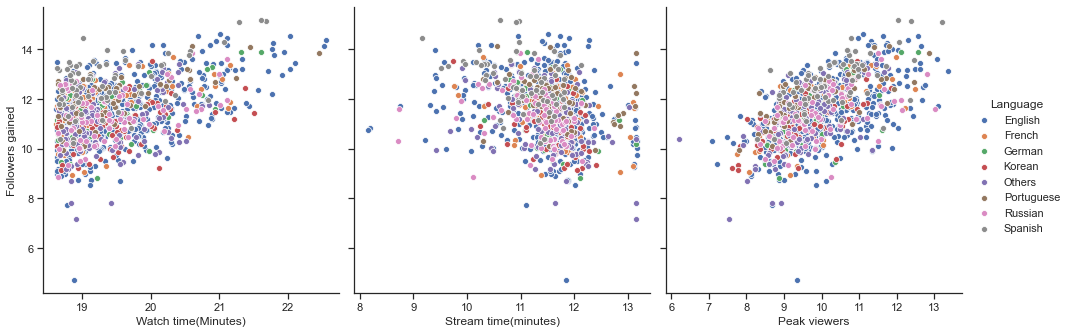

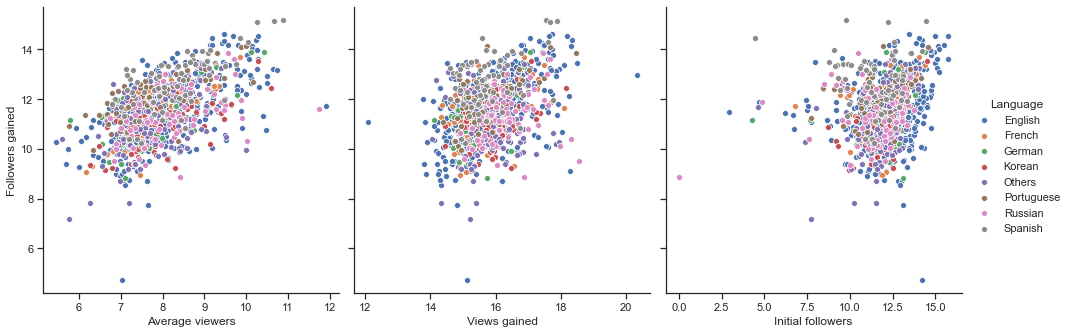

In [25]:
sns5 = sns.pairplot(df_log2, hue = 'Language', y_vars=['Followers gained'],
             x_vars=['Watch time(Minutes)', 'Stream time(minutes)',
                     'Peak viewers'],
                     height =4.5)

sns6 = sns.pairplot(df_log2, hue = 'Language', y_vars=['Followers gained'],
             x_vars=['Average viewers','Views gained', 'Initial followers'],
                     height =4.5)

___

## Primeiro Modelo - Regressão Linear Multipla

#### Preparando as variáveis qualitativas

Como algumas das variáveis são qualitativas, foi necessário transforma-las em quantitativas, para o caso de "Partenered" e "Mature", apenas transformou-se em valores booleanos 0 ou 1. Já a variável "Language" foi preciso transformá-la para o tipo dummies, que basicamente cria várias colunas com váriaveis booleanas, uma para cada categoria de "Language".

In [26]:
df_reg = df_log2.drop('Language' , 1)

df_reg = df_reg.join(pd.get_dummies(df_log2['Language']))

df_reg["Mature"] = df_reg["Mature"].astype(int)
df_reg["Partnered"] = df_reg["Partnered"].astype(int)

df_reg

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Initial followers,Mature,Partnered,English,French,German,Korean,Others,Portuguese,Russian,Spanish
0,22.547196,12.279555,12.313671,10.229765,14.993026,14.366408,18.348505,14.228605,0,1,1,0,0,0,0,0,0,0
1,22.530189,12.263610,12.647542,10.150738,15.485133,14.130456,18.312048,15.186686,0,1,1,0,0,0,0,0,0,0
2,22.453964,13.152466,12.866994,9.303466,14.385153,13.839011,18.446462,13.519603,1,1,0,0,0,0,0,1,0,0
3,22.102112,13.157228,12.613453,8.950792,15.187921,13.464514,18.484096,14.991351,0,1,1,0,0,0,0,0,0,0
4,22.023730,11.725291,12.562502,10.295597,16.005923,14.542298,18.184941,15.742744,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,18.624671,11.542678,9.586445,7.081709,10.779102,9.104424,18.288332,10.571625,0,1,1,0,0,0,0,0,0,0
995,18.623823,9.514880,9.969228,9.116469,13.307891,13.240486,14.586594,10.577350,0,1,0,0,0,0,0,0,0,1
996,18.623815,11.938193,8.278936,6.675823,12.270042,10.864541,15.297092,11.988681,0,1,0,0,0,1,0,0,0,0
998,18.622078,11.559284,9.263217,7.050123,13.213019,11.600121,15.183365,12.990739,0,1,1,0,0,0,0,0,0,0


#### Função de regressão

Usando uma função de regressão da biblioteca statsmodel "OLS", criu-se uma função, para gerar diversas variáveis, com o intuito de estudar as relações entre as colunas (Features), e a coluna de Followers Gained (Target). 

In [27]:
#Função
def regress(Y,X):
    
    #Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    #X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()

    return results

#### Separando Dataframe em teste e treinamento

Para construir o modelo, separou-se os dados em treino e teste.

In [154]:
X = df_reg[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
            'Average viewers','Views gained', 'Initial followers','Mature','Partnered',
           'English','French','German','Korean','Others','Portuguese','Russian','Spanish']]
Y = df_reg['Followers gained']

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

## Gerando resultados
Gerando os resultados da regressão:

In [163]:
results = regress(Y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Followers gained   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     42.36
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           9.25e-89
Time:                        15:13:23   Log-Likelihood:                -976.25
No. Observations:                 747   AIC:                             1985.
Df Residuals:                     731   BIC:                             2058.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3814      0.874      1.581      0.114      -0.334       3.096
Watch time(Minutes)      0.4605      0.320      1.441      0.150      -0.167       1.088
Stream time(minutes)    -0.2334      0.307     -0.760      0.447      -0.836       0.369
Peak viewers             0.2818      0.055      5.156      0.000       0.175       0.389
Average viewers          0.1739      0.300      0.580      0.562      -0.415       0.763
Views gained            -0.0156      0.062     -0.251      0.802      -0.138       0.107
Initial followers       -0.0221      0.025     -0.884      0.377      -0.071       0.027
Mature                  -0.2347      0.082     -2.854      0.004      -0.396      -0.073
Partnered                0.1531      0.218      0.703      0.483      -0.275       0.581
English                 -0.0166      0.130     -0.128      0.898      -0.272       0.239
French                   0.2768      0.159      1.740      0.082      -0.036       0.589
German                   0.0807      0.174      0.463      0.644      -0.262       0.423
Korean                  -0.2755      0.159     -1.734      0.083      -0.587       0.036
Others                  -0.1659      0.147     -1.126      0.260      -0.455       0.123
Portuguese               0.7254      0.170      4.276      0.000       0.392       1.059
Russian                 -0.2774      0.163     -1.701      0.089      -0.597       0.043
Spanish                  1.0338      0.159      6.491      0.000       0.721       1.347
==============================================================================
Omnibus:                       81.971   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.339
Skew:                          -0.621   Prob(JB):                     5.68e-41
Kurtosis:                       5.100   Cond. No.                     2.36e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Selecionando as variáveis de acordo com a significancia escolhida (1%)

Como várias das variáveis possuem valor p maior que a significância escolhida, retirou-se as variáveis de maior valor de uma a uma, até que apenas sobrassem probabilidades abaixo de 1%.

O valor de p está relacionado com os coeficientes $\beta_i$. Sobre o valor de $\beta_i$ temos duas hipóteses, a hipótese nula (H0), é que ele é igual a 0. E a alternativa (H1), é que ele é diferente de 0. Caso o valor-p encontrado na tabela, "P>|t|", seja menor que o valor de significancia, podemos rejeitar a hipótese nula.

In [182]:
X_train2 = X_train[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
            'French','Portuguese','Spanish']]

In [183]:
results = regress(Y_train, X_train2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Followers gained   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           6.98e-94
Time:                        15:18:54   Log-Likelihood:                -983.70
No. Observations:                 747   AIC:                             1981.
Df Residuals:                     740   BIC:                             2014.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1969      0.971      1.233      0.218      -0.709       3.103
Watch time(Minutes)      0.5882      0.067      8.783      0.000       0.457       0.720
Stream time(minutes)    -0.3801      0.064     -5.910      0.000      -0.506      -0.254
Peak viewers             0.3091      0.051      6.080      0.000       0.209       0.409
French                   0.3613      0.130      2.776      0.006       0.106       0.617
Portuguese               0.7939      0.139      5.697      0.000       0.520       1.067
Spanish                  1.1371      0.144      7.921      0.000       0.855       1.419
==============================================================================
Omnibus:                       85.971   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.930
Skew:                          -0.623   Prob(JB):                     1.57e-46
Kurtosis:                       5.286   Cond. No.                         725.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R² ajustado

A partir da análise do valor "Adj. R-squared", pode-se inferir que o modelo explica 45% da variabilidade dos dados, vale ressaltar que esse teste não diz nada a respeito da homoelasticidade.

#### Estatística f

O valor de "F-statistic" indica se a pelo menos uma das variáveis explicativas contribui significantemente para a predição da variável de estudo caso esse valor de prob-F seja menor que o valor de significancia escolhido(1%).

#### Teste Omnibus

O teste Omnibus testa a normalidade dos resíduos ( 𝜀𝑖 ), caso "Prob(Omnibus)" seja muito baixo, os resíduos não estão distribuídos como uma normal, caso seja maior que o nivel de significancia, esses resíduos se comportam como uma distribuição normal. Para nosso caso, o valor de Prob(Omnibus) indica que os resíduos não se comportam como uma normal.

#### Teste Jarque-Bera

Como Prob(JB) é muito baixo, os resíduos não são distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O ideal é que esse valor seja maior do que  𝛼  (nível de significância).

#### Teste Durbin-Watson

Esse teste verifica a autocorrelação dos resíduos, o valor do modelo é muito próximo de 2, logo, praticamente não há autocorrelação dos resíduos.

#### Parâmetros calculados 

In [184]:
# Recupera os parâmetros calculados
beta0 = results.params[0]  # const
beta1 = results.params[1]  # Watch time
beta2 = results.params[2]  # Stream time
beta3 = results.params[3]  # Peak viewers
beta4 = results.params[4]  # French
beta5 = results.params[5]  # Portuguese
beta6 = results.params[6]  # Spanish


#### Função do modelo

Definindo a função que retorna um valor estimado de acordo com o modelo.

In [185]:
def f(f1, f2,f3,f4,f5, f6):
    
    return beta0 + beta1*f1 + beta2*f2 + beta3*f3 + beta4*f4 + beta5*f5 + beta6*f6

#### Comparando resultados do modelo com a base de teste

In [186]:
#Features
f1 = X_test["Watch time(Minutes)"]
f2 = X_test["Stream time(minutes)"]
f3 = X_test["Peak viewers"]
f4 = X_test["French"]
f5 = X_test["Portuguese"]
f6 = X_test["Spanish"]

#Lista com predições
results_model = f(f1, f2,f3,f4,f5,f6)

#### Plotando gráfico de valores modelo X valores reais

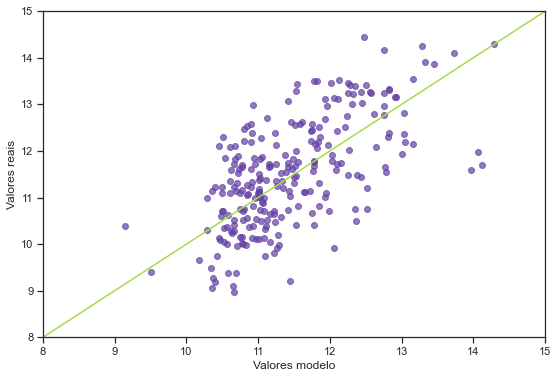

In [187]:
fig = plt.figure(figsize=(9, 6))

x = np.arange(8,16,1)
y = np.arange(8,16,1)

plt.scatter(results_model,Y_test, color='#6441A4', alpha = 0.7)
plt.plot(x,y,color = '#A5DB4B')
plt.axis(xmin = 8 , xmax = 15, ymin = 8, ymax = 15)
plt.xlabel('Valores modelo')
plt.ylabel('Valores reais')
plt.show()

In [188]:
from sklearn.metrics import r2_score
r2_score(Y_test, results_model)

0.4265105218333115

In [195]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, results_model)

0.8269692955989602

Analisando o gráfico, quanto mais próximos os pontos roxos estão da reta verde mais eficiente é o modelo, pois a reta seria uma representação caso os valores do modelo fossem iguais os valores reais da base de teste.

#### Analisando resíduos

Para analisar a homoelasticidade é necessário conferir a dispersão dos erros conforme as variáveis quantitativas variam:

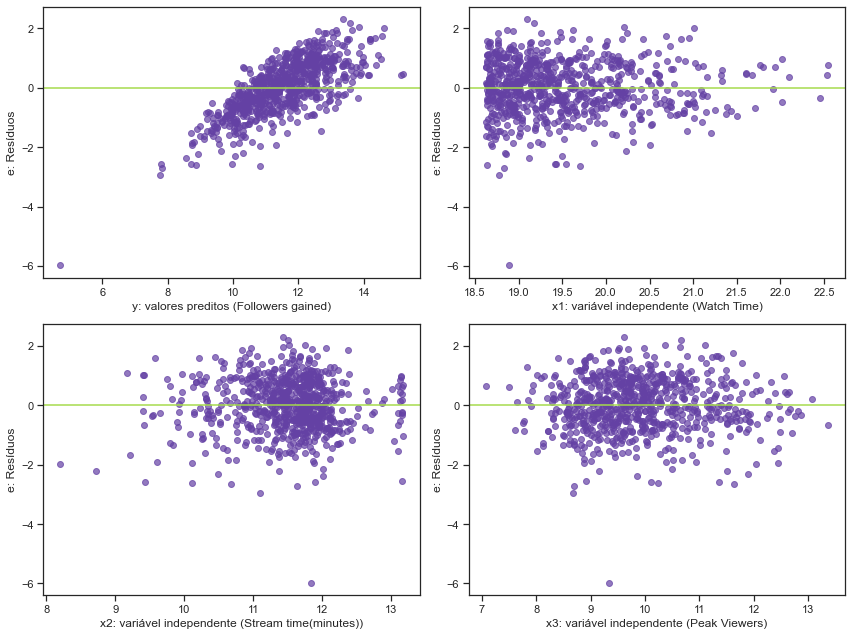

In [190]:
x0 = Y_train
x1 = X_train["Watch time(Minutes)"]
x2 = X_train["Stream time(minutes)"]
x3 = X_train["Peak viewers"]
x4 = X_train["French"]
x5 = X_train["Portuguese"]
x6 = X_train["Spanish"]



fig2 = plt.figure(figsize=(12, 9))
plt.subplot(221)
plt.scatter(x0, results.resid, color='#6441A4', alpha = 0.7); 
plt.axhline(y=0, color='#A5DB4B', linestyle='-')
plt.ylabel('e: Resíduos')
plt.xlabel('y: valores preditos (Followers gained)')

plt.subplot(222)
plt.scatter(x1, results.resid, color='#6441A4', alpha = 0.7); 
plt.axhline(y=0, color='#A5DB4B', linestyle='-')
plt.ylabel('e: Resíduos')
plt.xlabel('x1: variável independente (Watch Time)')

plt.subplot(223)
plt.scatter(x2, results.resid, color='#6441A4', alpha = 0.7); 
plt.axhline(y=0, color='#A5DB4B', linestyle='-')
plt.ylabel('e: Resíduos')
plt.xlabel('x2: variável independente (Stream time(minutes))')

plt.subplot(224)
plt.scatter(x3, results.resid, color='#6441A4', alpha = 0.7); 
plt.axhline(y=0, color='#A5DB4B', linestyle='-')
plt.ylabel('e: Resíduos')
plt.xlabel('x3: variável independente (Peak Viewers)')



plt.tight_layout()
plt.show()

Conforme esse gráficos, é possível perceber que a variância varia relativamente pouco para cada variável x, confirmando a hipótese de homoelasticidade.

## Segundo modelo - Random Forest

In [191]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

In [192]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.45052062217350364

In [194]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.7923468369113782

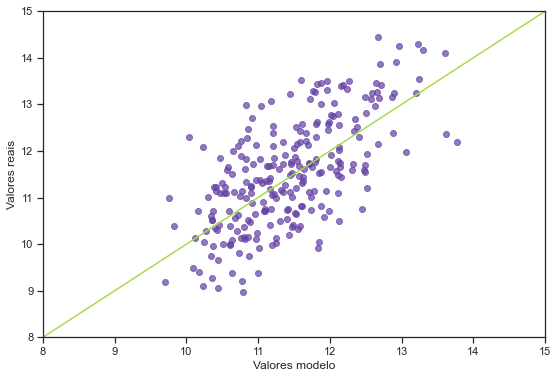

In [193]:
fig = plt.figure(figsize=(9, 6))

plt.scatter(Y_pred,Y_test, color='#6441A4', alpha = 0.7)
plt.plot(x,y,color = '#A5DB4B')
plt.axis(xmin = 8 , xmax = 15, ymin = 8, ymax = 15)
plt.xlabel('Valores modelo')
plt.ylabel('Valores reais')
plt.show()